# Reinforcement Learning Solution to the Towers of Hanoi Puzzle

### Zach Goodenow
10/25/17
<br>
CS 440

For this assignment, you will use reinforcement learning to solve the [Towers of Hanoi](https://en.wikipedia.org/wiki/Tower_of_Hanoi) puzzle.  

To accomplish this, you must modify the code discussed in lecture for learning to play Tic-Tac-Toe.  Modify the code  so that it learns to solve the three-disk, three-peg
Towers of Hanoi Puzzle.  In some ways, this will be simpler than the
Tic-Tac-Toe code.  

Steps required to do this include the following:

  - Represent the state, and use it as a tuple as a key to the Q dictionary.
  - Make sure only valid moves are tried from each state.
  - Assign reinforcement of $-1$ to each move unless it is a move to the goal state, for which the reinforcement is $0$.  This represents the goal of finding the shortest path to the goal.

Make a plot of the number of steps required to reach the goal for each
trial.  Each trial starts from the same initial state.  Decay epsilon
as in the Tic-Tac-Toe code.

## Requirements

First, how should we represent the state of this puzzle?  We need to keep track of which disks are on which pegs. Name the disks 1, 2, and 3, with 1 being the smallest disk and 3 being the largest. The set of disks on a peg can be represented as a list of integers.  Then the state can be a list of three lists.

For example, the starting state with all disks being on the left peg would be `[[1, 2, 3], [], []]`.  After moving disk 1 to peg 2, we have `[[2, 3], [1], []]`.

To represent that move we just made, we can use a list of two peg numbers, like `[1, 2]`, representing a move of the top disk on peg 1 to peg 2.

Now on to some functions. Define at least the following functions. Examples showing required output appear below.

   - `printState(state)`: prints the state in the form shown below
   - `validMoves(state)`: returns list of moves that are valid from `state`
   - `makeMove(state, move)`: returns new (copy of) state after move has been applied.
   - `trainQ(nRepetitions, learningRate, epsilonDecayFactor, validMovesF, makeMoveF)`: train the Q function for number of repetitions, decaying epsilon at start of each repetition. Returns Q and list or array of number of steps to reach goal for each repetition.
   - `testQ(Q, maxSteps, validMovesF, makeMoveF)`: without updating Q, use Q to find greedy action each step until goal is found. Return path of states.

A function that you might choose to implement is

   - `stateMoveTuple(state, move)`: returns tuple of state and move.  
    
This is useful for converting state and move to a key to be used for the Q dictionary.

# Hanoi Functions

In [137]:
import copy

# Prints the puzzle in a readable format
def printState(state):
    # Get longest length
    ll = 0
    for prong in state:
        ll = max(ll, len(prong))
    # Add longestLength - length amount of ' ' before each list
    grab = []
    for prong in state:
        numAdd = ll - len(prong)
        grab.append([' ']*numAdd + prong)
    for i in range(ll):
        row = []
        for prong in grab:
            row.append(str(prong[i]))
        print(' '.join(row))
    print('------')


# returns list of moves that are valid from state
def validMoves(state):
    moves = []
    top = []
    for s in state:
        top.append(s[0] if s != [] else float('inf')) # Mark empty pegs as inf
    top = [(en[0]+1, en[1]) for en in enumerate(top)]
    for f in top:
        if f[1] == float('inf'): continue # Cant move from an empty peg
        for t in top:
            if f == t: continue # Cant move to same peg youre from
            if t[1] > f[1]: moves.append([f[0], t[0]])
    return moves


# returns new (copy of) state after move has been applied.
def makeMove(state, move):
    if move not in validMoves(state):
        raise ValueError(str(move) + ' not a valid move for state: ' + str(state))
    stateC = copy.deepcopy(state) # Copy state for manipulation
    piece = stateC[move[0]-1].pop(0) # Remove piece from prong
    stateC[move[1]-1].insert(0,piece) # Put piece on new prong
    return stateC


# returns tuple of state and move.
def stateMoveTuple(state, move):
    stateTup = tuple(tuple(x) for x in state)
    return (stateTup, tuple(move))


# Returns true if Hanoi is complete on the final peg
def winner(state):
    for peg in state[:-1]:
        if peg != []:
            return False
    orderCheck = 1
    for ring in state[-1]:
        if ring != orderCheck:
            return False
        orderCheck += 1
    return True


## Hanoi Examples

In [138]:
state = [[1, 2, 3], [], []]
printState(state)

1    
2    
3    
------


In [139]:
move =[1, 2]

stateMoveTuple(state, move)

(((1, 2, 3), (), ()), (1, 2))

In [140]:
newstate = makeMove(state, move)
newstate

[[2, 3], [1], []]

In [141]:
printState(newstate)

2    
3 1  
------


# Train and Test

Some thoughts while making `trainQ` and `testQ`:
<br><br>
**Learning Rate** determines how quickly the values in Q change each update.  A higher learning rate changes the values more quickly.  Thus, the learning rate truly represents how quickly Q "learns".  But why not just set the learning rate to the highest it can be?  Because the values influence the choice made for each move.  So, when the learning rate is high, the "learning" that Q does early has the greatest influence. But if Q "learns" a non-optimal temporal difference error, it will likely never find the most optimal temporal difference errors.  This is because of the effect that the epsilon decay factor has on choosing a move.  
<br>
**Epsilon Decay Factor** determines the rate at which "exploring" decreases.  Here, exploring means the probability of choosing a random move vs using the temporal difference error to choose a move.  So, a value closer to 0 will cause the functions to rely on Q more quickly when training Q.  But why not just set the decay factor to a value closer to 0?  Well, we need to explore some random moves to get more information about how those moves influence success.  If epsilon gets too small before we have optimized Q, Q will likely never optimize.  
<br>
The [wikipedia website about Q-learning](https://en.wikipedia.org/wiki/Q-learning) was also a helpful resource for further understanding.

<div class="alert alert-block alert-info">
The *epsilonGreedy* function is used to choose the move in *trainQ*. *epsilon* represents the probability of making a random choice vs using Q to get the best move.  Some of the code from Lecture 15 was used to make these functions  

**IMPORTANT NOTE:** I added an additional argument to *trainQ* and *testQ* called *numRings* that defaults to 3.  This represents how many rings are on the first prong for the starting state.  This was for ease of applying these functions to larger Hanoi puzzles.  Also, the extra credit asks for functions to apply a 4 disk game.
<br><br>
I actually had this in mind when writing all these functions so they should be usable for games with 3, 4, 5, 6, 7, and 8 disks.  This is further explained in the extra credit section.
<br><br>
**FURTHER NOTE:** I added an one more argument to *trainQ* and *testQ* called *numProngs* that defaults to 3.  This represents how many prongs or towers there are for Hanoi states.  This was purely out of curiosity and it might be overkill but if anything, I can just remove it later.

In [142]:
import random
import numpy as np

In [143]:
# To slowly transition from taking random actions to taking the action currently believed to be best,
# called the greedy action, we slowly decay a parameter, ϵ,
# from 1 down towards 0 as the probability of selecting a random action.
# This is called the ϵ -greedy policy.
def epsilonGreedy(epsilon, Q, state, validMovesF):
    debug = False
    validMoves = (validMovesF(state))
    if np.random.uniform() < epsilon: # Random move
        randomMove = random.choice(validMoves)
        if debug:
            print('epsilonGreedy chose random move')
            print('\tValid moves are',validMoves)
            print('\tRandom move:', randomMove)
        return randomMove
    else: # Greedy Move
        # get Q values for all validMoves
        Qs = np.array([Q.get(stateMoveTuple(state,  m), 0) for m in validMoves])
        # get move with largest Q value
        # bestMove = validMoves[np.argmax(Qs)] # argmax returns index of max value
        bestMove = validMoves[np.argmin(Qs)] # argmin returns index of min value
        if debug:
            print('epsilonGreedy chose greedy mvoe')
            print('\tValid moves are', validMoves)
            print('\tQ values for validMoves are', Qs)
            print('\tBest move is', bestMove)
        return bestMove

In [144]:
# train the Q function for number of repetitions, decaying epsilon at start of each repetition.
# Returns Q and list or array of number of steps to reach goal for each repetition.
def trainQ(nRepetitions, learningRate, epsilonDecayFactor, validMovesF, makeMoveF, numRings = 3, numProngs = 3):
    # Set up Q table
    Q = {}  # empty dict to keep track of temporal difference error for each state, move pair
    stepsToGoal = np.zeros(nRepetitions) # To keep track of number steps to success for each game played
    outcomes = np.zeros(nRepetitions) # To keep track of the outcome of each game played.  I DONT THINK THIS IS USEFUL FOR HANOI
    epsilons = np.zeros(nRepetitions) # To keep track of the epsilon value for each game played

    # Start epislon at 1 and decay every step
    epsilon = 1.0
    
    # For debugging
    showMoves = False

    # This loop is to play the game nRepetitions times
    for nRep in range(nRepetitions):
        epsilon *= epsilonDecayFactor # Update epsilon
        epsilons[nRep] = epsilon # Keep track of epilon for each game played
        step = 0 # Keep track of how many steps each game takes
        # state = [[1, 2, 3], [], []] # Set up starting state
        # state = [[1, 2, 3, 4], [], []] # Set up starting state with 4 disks
        # state = [[1, 2, 3, 4, 5], [], []] # Set up starting state with 5 disks
        # state = [list(range(1, numRings + 1)), [], []]
        state = np.empty((numProngs, 0)).tolist() # get numProngs lists in a list
        state[0] = list(range(1, numRings + 1)) # Add numRings ints to first prong/list
        done = False

        # This loop is to play the game once and update Q accordingly
        while not done:
            # Pick move depending on weight of epsilon and values of Q
            move = epsilonGreedy(epsilon, Q, state, validMovesF)

            stamp = stateMoveTuple(state, move) # "Stamp" the state and move to be key in Q
            newState = makeMoveF(state, move) # Apply the move and save resulting state
            step += 1

            # If the state move tuple isnt in Q yet, give it -1 and update later
            if stamp not in Q:
                Q[stamp] = 1 # OR SHOULD THIS BE 0?!?!?!
            if showMoves:
                printState(newState)

            # If move resulted in win, update Q to reflect
            if winner(newState):
                if showMoves:
                    print('       Game Won with {} steps!'.format(step))
                Q[stamp] = 1
                done = True
                stepsToGoal[nRep] = step
                outcomes[nRep] = 1

            # if not a win, calculate the temporal difference error
            # use it to adjust the Q value of the previous state, move.
            # We do this only if we are not at the first move of a game. WHY? b/c no previous (state, move) on first move
            if step > 1:
                Q[oldStamp] += learningRate * (1 + Q[stamp] - Q[oldStamp])

            # Q(oldstate, oldmove) = Q(oldstate, oldmove) + learningrate * (-1 + Q(state, move) - Q(oldstate, oldmove)

            # Set up for next move:
            # Save current state, move as old state, move so Q(state, move) can be updated after next steps
            oldState, oldMove = state, move
            # Stamp old state, move.
            oldStamp = stateMoveTuple(oldState, oldMove)
            # Take next step for state
            state = newState
        
    return Q, stepsToGoal

In [145]:
# without updating Q, use Q to find greedy action each step until goal is found. Return path of states.
def testQ(Q, maxSteps, validMovesF, makeMoveF, numRings = 3, numProngs = 3):
    epsilon = 0 # Because we dont want any random moves
    step = 0  # Keep track of how many steps each game takes
    # state = [[1, 2, 3], [], []]  # Set up starting state
    # state = [[1, 2, 3, 4], [], []]  # Set up starting state with 4 disks
    # state = [[1, 2, 3, 4, 5], [], []]  # Set up starting state with 5 disks
    # state = [list(range(1, numRings + 1)), [], []]
    state = np.empty((numProngs, 0)).tolist()  # get numProngs lists in a list
    state[0] = list(range(1, numRings + 1))  # Add numRings ints to first prong/list
    path = [] # To keep track of the steps and states taken

    # Play the game until done
    while step <= maxSteps:
        # Put the state in the path
        path.append(state)
        # Check completion
        if winner(state):
            break
        step += 1
        # use Q to find greedy action
        move = epsilonGreedy(epsilon, Q, state, validMovesF)
        # make the move
        state = makeMoveF(state, move)

    return path

## Examples for Test and Train

[This website](http://hanoi.aimary.com/index_en.php) was helpful for seeing if my functions were getting the lowest number of steps for each number of rings.

I messed around in PyCharm for a while to see what changing the values for `learningRate` and `epsilonDecayFactor` would do.

In [146]:
# from A5mysolution import * 

In [147]:
Q, stepsToGoal = trainQ(50, 0.5, 0.7, validMoves, makeMove)

In [148]:
stepsToGoal

array([ 24.,  69.,  16.,  61.,  23.,  77.,  40.,  14.,  13.,  23.,  17.,
        45.,   9.,  48.,  10.,  13.,   7.,  15.,  32.,   7.,  10.,   8.,
        17.,  10.,   7.,  10.,   7.,   7.,   7.,   7.,   7.,   7.,   7.,
         7.,   7.,   7.,   7.,   7.,   7.,   7.,   7.,   7.,   7.,   7.,
         7.,   7.,   7.,   7.,   7.,   7.])

In [149]:
path = testQ(Q, 20, validMoves, makeMove)

In [150]:
path

[[[1, 2, 3], [], []],
 [[2, 3], [], [1]],
 [[3], [2], [1]],
 [[3], [1, 2], []],
 [[], [1, 2], [3]],
 [[1], [2], [3]],
 [[1], [], [2, 3]],
 [[], [], [1, 2, 3]]]

In [151]:
for s in path:
    printState(s)
    print()

1    
2    
3    
------

2    
3   1
------

3 2 1
------

  1  
3 2  
------

  1  
  2 3
------

1 2 3
------

    2
1   3
------

    1
    2
    3
------



This is a snip of how I tested my functions with 3 disks and 3 prongs

In [152]:
Q, stepsToGoal = trainQ(50, 0.5, 0.7, validMoves, makeMove)
print(stepsToGoal)
minSteps = min(stepsToGoal)
times = sum(stepsToGoal == minSteps)
print('lowest steps `{}` found `{}` times'.format(minSteps, times))

# Test test
path = testQ(Q, 100, validMoves, makeMove)
# for s in path:
#     printState(s)
#     print()
printState(path[-3])
printState(path[-2])
printState(path[-1])
print('It took {} steps to win this puzzle'.format(len(path)-1))

[  90.  104.   94.   34.   64.    9.   27.   48.   12.    7.   10.   13.
   27.   12.    9.    7.   11.    7.   32.    7.    7.    8.    7.    7.
    7.    7.    7.    7.    7.    7.    7.    7.    7.    7.    7.    7.
    7.    7.    7.    7.    7.    7.    7.    7.    7.    7.    7.    7.
    7.    7.]
lowest steps `7.0` found `33` times
1 2 3
------
    2
1   3
------
    1
    2
    3
------
It took 7 steps to win this puzzle


<div class="alert alert-block alert-info">
This is some code I used to try different combinations of *learningRat* and *epsilonDecayFactor*. I still have some trouble figuring out which values will optimize Q and how to tell if Q is actually optimal or was just lucky when picking random moves during training.
<br><br>
Code is commented out because it takes a while and is not necessary for this assignment.  But I wanted to have it in this notebook for future reference.

In [153]:
# find most optimal combo of learning rate and decay facminSteps_overall = float('inf')
times_overall = 0
l_overall = -1
e_overall = -1
learningRates = np.arange(0.05, 1, 0.05) # Test learning rates between 0.05 and 1 incremented by 0.05
epDecayFactors =  #np.arange(0.2, 1, 0.05) Test decay factors between 0.2 and 1 incremented by 0.05
# for l in learningRates:
#     for e in epDecayFactors:
#         if abs(l-e) > 0.7 or l+e <= 0.35:
#             print('Skipped combo', l, e)
#         else:
#             print('Learning rate {} and EDF {}'.format(l, e))
#             Q, stepsToGoal = trainQ(50, l, e, validMoves, makeMove)
#             minSteps = min(stepsToGoal)
#             times = sum(stepsToGoal == minSteps)
#             print('\tlowest steps `{}` found `{}` times'.format(minSteps, times))
#             # check for best combo
#             if minSteps_overall >= minSteps:
#                 if minSteps_overall == minSteps:
#                     if times_overall > times:
#                         continue
#                 minSteps_overall = minSteps
#                 times_overall = times
#                 l_overall = l
#                 e_overall = e
# print('Learning rate {} and EDF {} found \n\tlowest steps `{}` found `{}` times'.format(l_overall, e_overall, minSteps_overall, times_overall))
# OUTCOMES FROM A FEW RUNS:
    # Learning rate 0.95000001 and EDF 0.79998 found lowest steps `7.0` found `40` times
    # Learning rate 0.950001 and EDF 0.499999994 found lowest steps `7.0` found `45` times

## Plotting

I didnt end up applying the plotting from lecture 15 because it didnt directly translate.  For my sake, printing the step count was good enough for debugging, though I would have liked to visualize the data better. 
<br><br>
After some messing around, I was able to make a few plots that were helpful to visualize

In [154]:
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.display import display, clear_output

In [232]:
def plotResult(Q,stepsToGoal,epsilonDecayFactor,nGames):
    if nGames==0:
        return
    
    # Make epsilon tracker
    epsilon = 1.0
    epsilons = np.zeros(nGames)
    for nRep in range(nGames):
        epsilon *= epsilonDecayFactor # Update epsilon
        epsilons[nRep] = epsilon
        
    # Set up plot
    nBins = 100 if len(stepsToGoal) > 300 else len(stepsToGoal)
    nPer = int(nGames/nBins)
    outcomeRows = stepsToGoal.reshape((-1,nPer))
    outcomeRows = outcomeRows[:int(nGames/float(nPer))+1,:]
    avgs = np.mean(outcomeRows,axis=1)
    # First plot
    plt.subplot(3,1,1)
    xs = np.linspace(nPer,nGames,len(avgs))
    plt.plot(xs, avgs)
    plt.xlabel('Games')
    plt.ylabel('Mean of Steps')
    plt.title('Steps to goal with bins of {:d} Games'.format(nPer))
    # Second plot
    plt.subplot(3,1,2)
    plt.plot(epsilons[:nGames])
    plt.ylabel('$\epsilon$')
    # Third plot
    plt.subplot(3,1,3)
    tempDiffVals = list(Q.values())
    plt.hist(tempDiffVals, bins=np.arange(min(tempDiffVals), max(tempDiffVals) + 1, 1), rwidth=0.9)
    plt.title('Temporal difference values in Q histogram'.format(nPer))

lowest steps `7.0` found `31` times


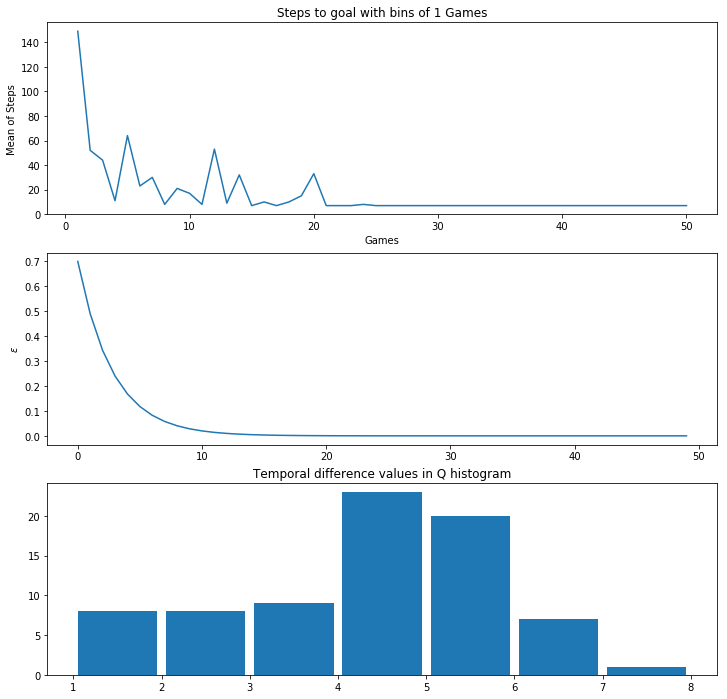

In [233]:
# Visualize
nRepetitions = 50
learningRate = 0.5
epsilon = 1.0
epsilonDecayFactor = 0.7

Q, stepsToGoal = trainQ(nRepetitions, learningRate, epsilonDecayFactor, validMoves, makeMove)

# Get basic step info
minSteps = min(stepsToGoal)
times = sum(stepsToGoal == minSteps)
print('lowest steps `{}` found `{}` times'.format(minSteps, times))
# Plot steps and epsilons
plt.figure(figsize=(12,12))
plotResult(Q, stepsToGoal, epsilonDecayFactor, nRepetitions)

## Grading

Download and extract `A5grader.py` from [A5grader.tar](http://www.cs.colostate.edu/~anderson/cs440/notebooks/A5grader.tar).

In [234]:
%run -i A5grader.py


Testing validMoves([[1], [2], [3]])

--- 10/10 points. Correctly returned [[1, 2], [1, 3], [2, 3]]

Testing validMoves([[], [], [1, 2, 3]])

--- 10/10 points. Correctly returned [[3, 1], [3, 2]]

Testing makeMove([[], [], [1, 2, 3]], [3, 2])

--- 10/10 points. Correctly returned [[], [1], [2, 3]]

Testing makeMove([[2], [3], [1]], [1, 2])

--- 10/10 points. Correctly returned [[], [2, 3], [1]]

Testing   Q, steps = trainQ(1000, 0.5, 0.7, validMoves, makeMove).

--- 10/10 points. Q dictionary has correct number of entries.

--- 10/10 points. The mean of the number of steps is 7.47 which is correct.

Testing   path = testQ(Q, 20, validMoves, makeMove).

--- 20/20 points. Correctly returns path of length 8, less than 10.

A5 Execution Grade is 80/80

 Remaining 20 points will be based on your text describing the trainQ and test! functions.

A5 FINAL GRADE is __/100


## Extra Credit

Modify your code to solve the Towers of Hanoi puzzle with 4 disks instead of 3.  Name your functions

    - printState_4disk
    - validMoves_4disk
    - makeMove_4disk

Find values for number of repetitions, learning rate, and epsilon decay factor for which trainQ learns a Q function that testQ can use to find the shortest solution path.  Include the output from the successful calls to trainQ and testQ.

My functions for `printState`, `validMoves`, and `makeMove` are generalized to work on any size hanoi puzzle.  But I will define these functions below and just have them return the values for their corresponding functions.

In [235]:
def printState_4disk(state):
    printState(state)
    
def validMoves_4disk(state):
    return validMoves(state)

def makeMove_4disk(state, move):
    return makeMove(state, move)

Some testing of these functions

In [236]:
state_4disk = [[1, 2, 3, 4], [], []]
printState_4disk(state_4disk)

1    
2    
3    
4    
------


In [237]:
move = [1, 2]

stateMoveTuple(state_4disk, move)

(((1, 2, 3, 4), (), ()), (1, 2))

In [238]:
newstate = makeMove_4disk(state_4disk, move)
printState_4disk(newstate)

2    
3    
4 1  
------


In [239]:
newstate = makeMove_4disk(newstate, [1,3])
printState_4disk(newstate)

3    
4 1 2
------


In [240]:
validMoves_4disk(newstate)

[[2, 1], [2, 3], [3, 1]]

### Add pegs

My functions have been generalized extend to multiple pegs as well

In [241]:
# 4 disks 4 pegs
prong4 = [[1, 2, 3, 4], [], [], []]
move = [1,4]
printState(prong4)
stateMoveTuple(prong4, move)

1      
2      
3      
4      
------


(((1, 2, 3, 4), (), (), ()), (1, 4))

In [242]:
newstate = makeMove(prong4, move)
printState(newstate)
print(newstate)

2      
3      
4     1
------
[[2, 3, 4], [], [], [1]]


In [243]:
print(validMoves(newstate))

[[1, 2], [1, 3], [4, 1], [4, 2], [4, 3]]


In [244]:
prong4Win = [[], [], [], [1, 2, 3, 4]]
print(winner(prong4Win))

True


### Apply to more disks

[This website](http://hanoi.aimary.com/index_en.php) provided values for minimum number of steps it takes to solve different Hanoi puzzles:

    - 3 Disks: 7
    - 4 Disks: 15
    - 5 Disks: 31
    - 6 Disks: 63
    - 7 Disks: 127
    - 8 Disks: 255

#### 4 DISK

In [259]:
# 4 DISK SOLUTION SHOULD BE 15
nRepetitions = 100
learningRate = 0.5
epsilonDecayFactor = 0.7

Q, stepsToGoal = trainQ(nRepetitions, learningRate, epsilonDecayFactor, validMoves, makeMove, numRings = 4)
print(stepsToGoal)
minSteps = min(stepsToGoal)
times = sum(stepsToGoal == minSteps)
print('lowest steps `{}` found `{}` times'.format(minSteps, times))

# Test test
path = testQ(Q, 100, validMoves, makeMove, numRings = 4)
for s in path:
    printState(s)
    print()
print('It took {} steps to win this puzzle'.format(len(path)-1))

[ 965.   89.  146.  229.   81.   30.  224.   81.  177.   72.  198.   32.
   64.   87.   53.   33.  130.   49.  140.   32.   40.  118.   51.   22.
   79.   49.  133.   27.   41.   19.   69.   34.   38.   17.   20.   29.
   89.   70.   24.   29.   15.   17.   27.  126.   17.   21.   17.   17.
   16.   37.   15.   17.   23.   15.   30.   15.   88.   15.   16.   15.
   15.   15.   15.   15.   15.   15.   15.   15.   15.   15.   15.   15.
   15.   15.   15.   15.   15.   15.   15.   15.   15.   15.   15.   15.
   15.   15.   15.   15.   15.   15.   15.   15.   15.   15.   15.   15.
   15.   15.   15.   15.]
lowest steps `15.0` found `46` times
1    
2    
3    
4    
------

2    
3    
4 1  
------

3    
4 1 2
------

3   1
4   2
------

    1
4 3 2
------

1    
4 3 2
------

1 2  
4 3  
------

  1  
  2  
4 3  
------

  1  
  2  
  3 4
------

  2 1
  3 4
------

    1
2 3 4
------

1    
2 3 4
------

1   3
2   4
------

    3
2 1 4
------

    2
    3
  1 4
------

    1
    2
    3

lowest steps `15.0` found `46` times
It took 15 steps to win this puzzle


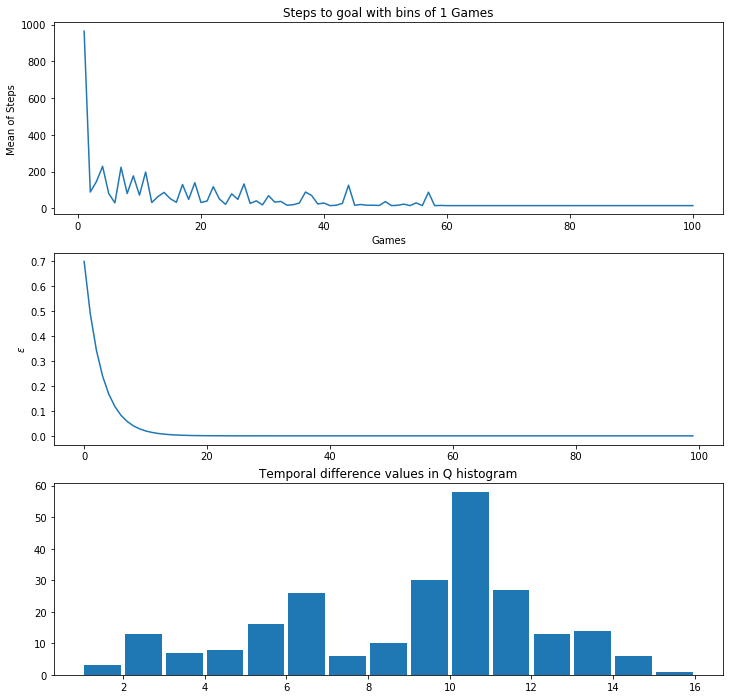

In [260]:
# Visualize

# Get basic step info
minSteps = min(stepsToGoal)
times = sum(stepsToGoal == minSteps)
print('lowest steps `{}` found `{}` times'.format(minSteps, times))
print('It took {} steps to win this puzzle'.format(len(path)-1))

# Plot steps and epsilons
plt.figure(figsize=(12,12))
plotResult(Q, stepsToGoal, epsilonDecayFactor, nRepetitions)

#### 5 DISK

In [263]:
# 5 DISK SOLUTION SHOULD BE 31
nRepetitions = 299
learningRate = 0.4
epsilonDecayFactor = 0.8

Q, stepsToGoal = trainQ(nRepetitions, learningRate, epsilonDecayFactor, validMoves, makeMove, numRings = 5) # CHANGED TO 150 REPS
print(stepsToGoal)
minSteps = min(stepsToGoal)
times = sum(stepsToGoal == minSteps)
print('lowest steps `{}` found `{}` times'.format(minSteps, times))

# Test test
path = testQ(Q, 100, validMoves, makeMove, numRings = 5)
for s in path:
    printState(s)
    print()
print('It took {} steps to win this puzzle'.format(len(path)-1))

[ 2851.  2844.  1886.   730.   641.   281.   181.   773.   935.   393.
   314.   232.   183.   237.   269.   359.   733.   314.   216.   143.
   241.   517.   119.   284.   199.   204.   148.   587.   318.   505.
   102.   273.   106.   291.   165.   311.   112.   450.   109.   435.
    87.   171.   104.   142.   128.   365.    68.   263.   257.   172.
   116.   449.   113.   279.    63.   121.   108.   138.    62.   325.
   133.    66.   278.   118.   306.   191.    74.    98.   304.    73.
   155.   107.   185.    75.   304.    66.   228.    51.   122.    62.
    72.    78.   281.    50.   123.    70.    74.   198.   231.    78.
    74.   346.    65.   101.   188.    35.   152.    62.    61.   212.
   111.    34.    68.    55.    60.   126.   231.    52.    43.   152.
    49.    57.   124.   244.    43.    93.    38.    35.    48.    50.
   167.    59.    43.    35.    76.   269.    47.   112.    35.    38.
    60.    41.   218.    45.    39.    59.    64.    33.    34.   102.
    82

lowest steps `31.0` found `134` times
It took 31 steps to win this puzzle


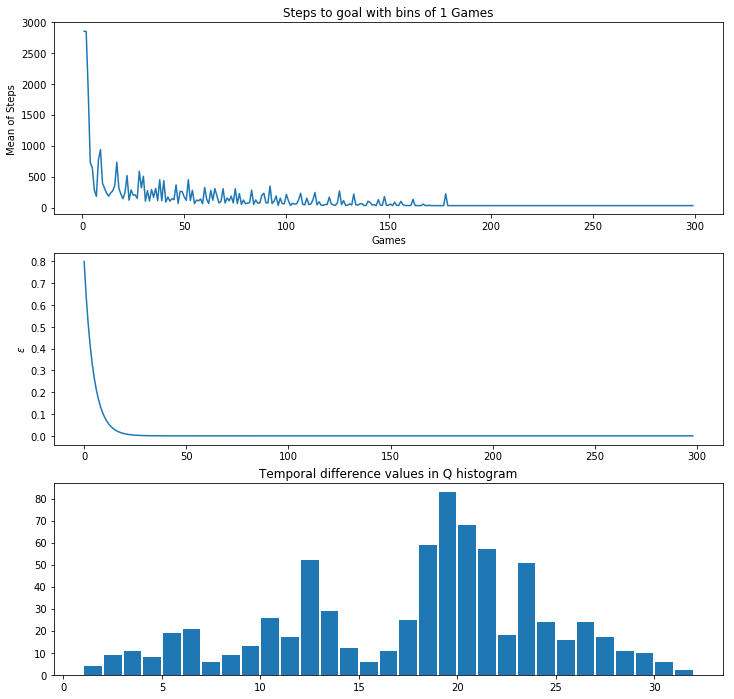

In [264]:
# Visualize
# Get basic step info
minSteps = min(stepsToGoal)
times = sum(stepsToGoal == minSteps)
print('lowest steps `{}` found `{}` times'.format(minSteps, times))
print('It took {} steps to win this puzzle'.format(len(path)-1))

# Plot steps and epsilons
plt.figure(figsize=(12,12))
plotResult(Q, stepsToGoal, epsilonDecayFactor, nRepetitions)

#### 6 DISK

In [271]:
# 6 DISK SOLUTION SHOULD BE 63
nRepetitions = 500
learningRate = 0.5
epsilonDecayFactor = 0.9

Q, stepsToGoal = trainQ(nRepetitions, learningRate, epsilonDecayFactor, validMoves, makeMove, numRings = 6) # CHANGED TO 500 REPS
# print(stepsToGoal)
print('First 10 attempts', stepsToGoal[0:10])
print('Last 10 attempts', stepsToGoal[-9:-1])
minSteps = min(stepsToGoal)
times = sum(stepsToGoal == minSteps)
print('lowest steps `{}` found `{}` times'.format(minSteps, times))

# Test test
path = testQ(Q, 100, validMoves, makeMove, numRings = 6)
print(path[-3])
print(path[-2])
print(path[-1])
print('It took {} steps to win this puzzle'.format(len(path)-1))

First 10 attempts [ 11546.   3207.   6224.   2912.  10130.   1643.   2906.   2897.   2147.
   2191.]
Last 10 attempts [ 63.  63.  63.  63.  63.  63.  63.  63.]
lowest steps `63.0` found `174` times
[[2], [1], [3, 4, 5, 6]]
[[], [1], [2, 3, 4, 5, 6]]
[[], [], [1, 2, 3, 4, 5, 6]]
It took 63 steps to win this puzzle


lowest steps `63.0` found `174` times
It took 63 steps to win this puzzle


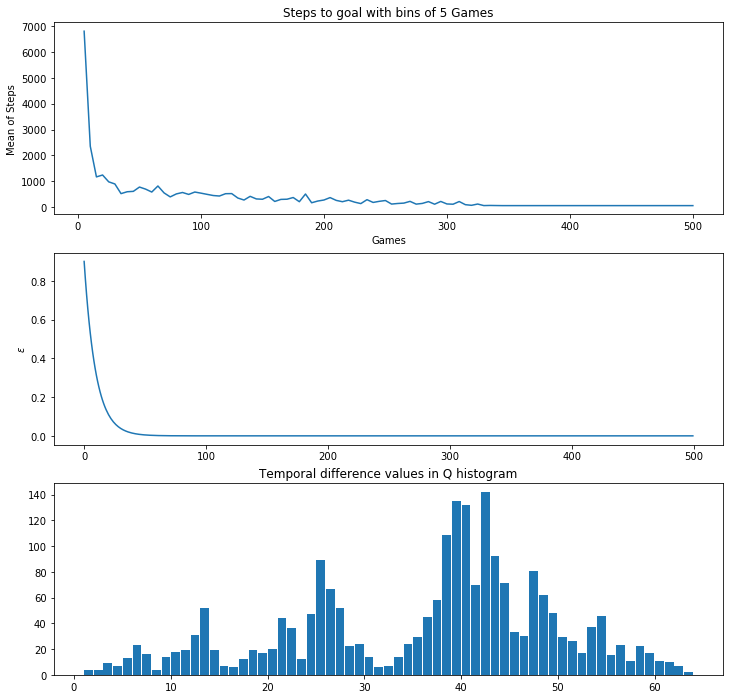

In [272]:
# Visualize
# Get basic step info
minSteps = min(stepsToGoal)
times = sum(stepsToGoal == minSteps)
print('lowest steps `{}` found `{}` times'.format(minSteps, times))
print('It took {} steps to win this puzzle'.format(len(path)-1))

# Plot steps and epsilons
plt.figure(figsize=(12,12))
plotResult(Q, stepsToGoal, epsilonDecayFactor, nRepetitions)

#### 7 DISK

In [295]:
# 7 DISK SOLUTION SHOULD BE 127
nRepetitions = 1200 # CHANGED TO 800 REPS
learningRate = 0.5
epsilonDecayFactor = 0.99

Q, stepsToGoal = trainQ(nRepetitions, learningRate, epsilonDecayFactor, 
                        validMoves, makeMove, numRings = 7) # CHANGED TO 500 REPS
print('First 10 attempts', stepsToGoal[:10])
print('Last 10 attempts', stepsToGoal[-10:])
minSteps = min(stepsToGoal)
times = sum(stepsToGoal == minSteps)
print('lowest steps `{}` found `{}` times'.format(minSteps, times))

# Test test
path = testQ(Q, 200, validMoves, makeMove, numRings = 7) # CHANGED TO 200 MAX STEPS
print(path[-3])
print(path[-2])
print(path[-1])
print('It took {} steps to win this puzzle'.format(len(path)-1))

First 10 attempts [ 145902.   73727.   55404.   69775.   34486.  106139.   22801.    7875.
   18451.   20058.]
Last 10 attempts [ 129.  129.  129.  129.  129.  129.  129.  129.  129.  129.]
lowest steps `128.0` found `1` times
[[1], [2], [3, 4, 5, 6, 7]]
[[1], [], [2, 3, 4, 5, 6, 7]]
[[], [], [1, 2, 3, 4, 5, 6, 7]]
It took 129 steps to win this puzzle


lowest steps `128.0` found `1` times
It took 129 steps to win this puzzle


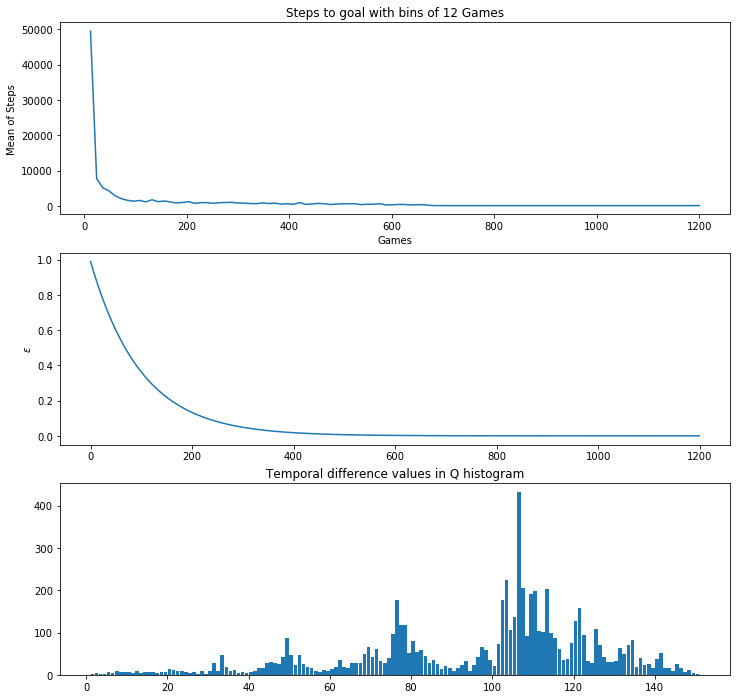

In [296]:
# Visualize
# Get basic step info
minSteps = min(stepsToGoal)
times = sum(stepsToGoal == minSteps)
print('lowest steps `{}` found `{}` times'.format(minSteps, times))
print('It took {} steps to win this puzzle'.format(len(path)-1))

# Plot steps and epsilons
plt.figure(figsize=(12,12))
plotResult(Q, stepsToGoal, epsilonDecayFactor, nRepetitions)

Output from a succesful run of 7 disks is saved below

In [ ]:
# Q, stepsToGoal = trainQ(800, 0.5, 0.7, validMoves, makeMove, numRings = 7) # CHANGED TO 800 REPS

# Outcomes: 800 X wins 0 O wins 0 draws
# First 10 attempts [ 35007.  27656.  10853.   5413.   5480.  13995.   4199.  10072.   2683.
#    7562.]
# Last 10 attempts [ 127.  499.  127.  180.  127.  127.  232.  127.  129.  127.]
# lowest steps `127.0` found `10` times
# [[1], [2], [3, 4, 5, 6, 7]]
# [[1], [], [2, 3, 4, 5, 6, 7]]
# [[], [], [1, 2, 3, 4, 5, 6, 7]]
# It took 127 steps to win this puzzle

#### 8 DISK

**This example takes way too long so it is commented out but the output from one run should still be here**

In [19]:
# 8 DISK SOLUTION SHOULD BE 255
Q, stepsToGoal = trainQ(4000, 0.35, 0.999, validMoves, makeMove, numRings=8)
print(stepsToGoal)
minSteps = min(stepsToGoal)
times = sum(stepsToGoal == minSteps)
print('lowest steps `{}` found `{}` times'.format(minSteps, times))
# for elm in Q:
#     print(elm, '-->', Q.get(elm))

# Test
path = testQ(Q, 300, validMoves, makeMove, numRings=8)  # CHANGED TO 300 MAX STEPS
print(path[-3])
print(path[-2])
print(path[-1])
print('It took {} steps to win this puzzle'.format(len(path) - 1))

Outcomes: 4000 X wins 0 O wins 0 draws
[  1.61501000e+05   5.38960000e+05   8.87920000e+04 ...,   2.66000000e+02
   2.87000000e+02   2.72000000e+02]
lowest steps `255.0` found `2` times
[[2], [1], [3, 4, 5, 6, 7, 8]]
[[], [1], [2, 3, 4, 5, 6, 7, 8]]
[[], [], [1, 2, 3, 4, 5, 6, 7, 8]]
It took 257 steps to win this puzzle


**The ouptut from the 8 disk run if it doesnt save**

In [ ]:
# Outcomes: 4000 X wins 0 O wins 0 draws
# [  1.61501000e+05   5.38960000e+05   8.87920000e+04 ...,   2.66000000e+02
#    2.87000000e+02   2.72000000e+02]
# lowest steps `255.0` found `2` times
# [[2], [1], [3, 4, 5, 6, 7, 8]]
# [[], [1], [2, 3, 4, 5, 6, 7, 8]]
# [[], [], [1, 2, 3, 4, 5, 6, 7, 8]]
# It took 257 steps to win this puzzle

## Try 5 disks with 4 prongs

In [288]:
# 6 DISK 4 PRONG SOLUTION SHOULD BE ???????
nRepetitions = 600
learningRate = 0.5
epsilonDecayFactor = 0.9

Q, stepsToGoal = trainQ(nRepetitions, learningRate, 
                        epsilonDecayFactor, validMoves, makeMove, numRings = 5, numProngs = 4)
# print(stepsToGoal)
print('First 10 attempts', stepsToGoal[0:10])
print('Last 10 attempts', stepsToGoal[-9:-1])
minSteps = min(stepsToGoal)
times = sum(stepsToGoal == minSteps)
print('lowest steps `{}` found `{}` times'.format(minSteps, times))

# Test test
path = testQ(Q, 300, validMoves, makeMove, numRings = 5, numProngs = 4)
print(path[-3])
print(path[-2])
print(path[-1])
print('It took {} steps to win this puzzle'.format(len(path)-1))

First 10 attempts [ 7570.   475.  4008.  1271.  2230.  1689.  2449.  2005.   742.   447.]
Last 10 attempts [ 13.  13.  13.  13.  13.  13.  13.  13.]
lowest steps `13.0` found `178` times
[[1], [], [2], [3, 4, 5]]
[[1], [], [], [2, 3, 4, 5]]
[[], [], [], [1, 2, 3, 4, 5]]
It took 13 steps to win this puzzle


lowest steps `13.0` found `178` times
It took 13 steps to win this puzzle


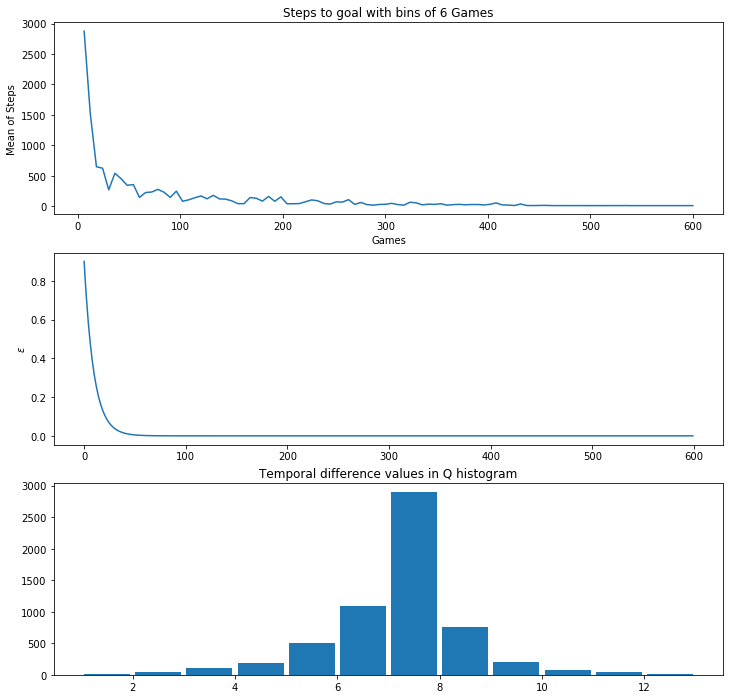

In [289]:
# Visualize
# Get basic step info
minSteps = min(stepsToGoal)
times = sum(stepsToGoal == minSteps)
print('lowest steps `{}` found `{}` times'.format(minSteps, times))
print('It took {} steps to win this puzzle'.format(len(path)-1))

# Plot steps and epsilons
plt.figure(figsize=(12,12))
plotResult(Q, stepsToGoal, epsilonDecayFactor, nRepetitions)

## Try 6 disks with 4 prongs

In [292]:
# 6 DISK 4 PRONG SOLUTION SHOULD BE ???????
nRepetitions = 800
learningRate = 0.5
epsilonDecayFactor = 0.99

Q, stepsToGoal = trainQ(nRepetitions, learningRate, epsilonDecayFactor, 
                        validMoves, makeMove, numRings = 6, numProngs = 4)
# print(stepsToGoal)
print('First 10 attempts', stepsToGoal[0:10])
print('Last 10 attempts', stepsToGoal[-9:-1])
minSteps = min(stepsToGoal)
times = sum(stepsToGoal == minSteps)
print('lowest steps `{}` found `{}` times'.format(minSteps, times))

# Test test
path = testQ(Q, 300, validMoves, makeMove, numRings = 6, numProngs = 4)
print(path[-3])
print(path[-2])
print(path[-1])
print('It took {} steps to win this puzzle'.format(len(path)-1))

First 10 attempts [  1082.  63015.   3267.   4802.   5982.  15571.   2876.  13454.   4903.
   5514.]
Last 10 attempts [ 17.  17.  17.  17.  17.  17.  17.  17.]
lowest steps `17.0` found `191` times
[[1], [], [2], [3, 4, 5, 6]]
[[1], [], [], [2, 3, 4, 5, 6]]
[[], [], [], [1, 2, 3, 4, 5, 6]]
It took 17 steps to win this puzzle


lowest steps `17.0` found `191` times
It took 17 steps to win this puzzle


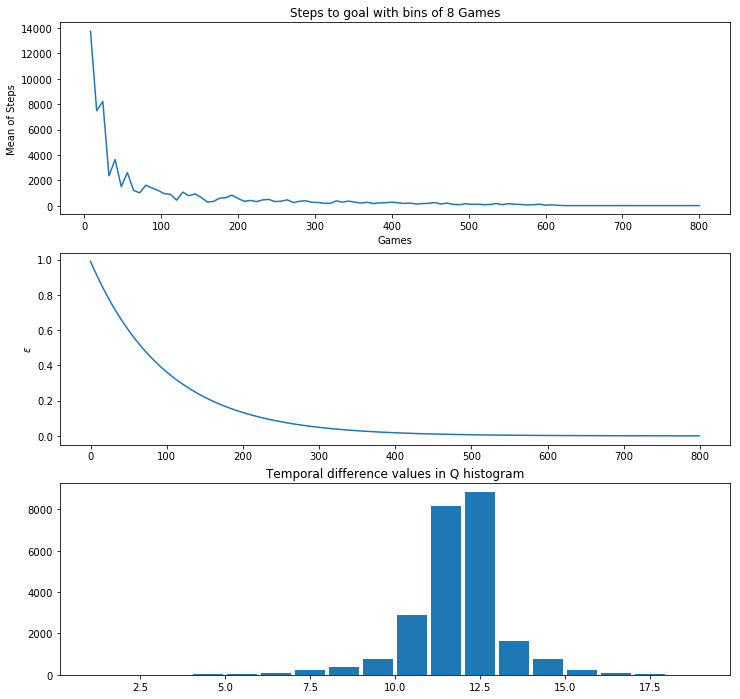

In [293]:
# Visualize
# Get basic step info
minSteps = min(stepsToGoal)
times = sum(stepsToGoal == minSteps)
print('lowest steps `{}` found `{}` times'.format(minSteps, times))
print('It took {} steps to win this puzzle'.format(len(path)-1))

# Plot steps and epsilons
plt.figure(figsize=(12,12))
plotResult(Q, stepsToGoal, epsilonDecayFactor, nRepetitions)

## Try 9 disks with 4 prongs

In [294]:
# 6 DISK 4 PRONG SOLUTION SHOULD BE ???????
nRepetitions = 1000
learningRate = 0.5
epsilonDecayFactor = 0.99

Q, stepsToGoal = trainQ(nRepetitions, learningRate, epsilonDecayFactor, 
                        validMoves, makeMove, numRings = 9, numProngs = 4)
# print(stepsToGoal)
print('First 10 attempts', stepsToGoal[0:10])
print('Last 10 attempts', stepsToGoal[-9:-1])
minSteps = min(stepsToGoal)
times = sum(stepsToGoal == minSteps)
print('lowest steps `{}` found `{}` times'.format(minSteps, times))

# Test test
path = testQ(Q, 300, validMoves, makeMove, numRings = 9, numProngs = 4)
print(path[-3])
print(path[-2])
print(path[-1])
print('It took {} steps to win this puzzle'.format(len(path)-1))

KeyboardInterrupt: 

In [ ]:
# Visualize
# Get basic step info
minSteps = min(stepsToGoal)
times = sum(stepsToGoal == minSteps)
print('lowest steps `{}` found `{}` times'.format(minSteps, times))
print('It took {} steps to win this puzzle'.format(len(path)-1))

# Plot steps and epsilons
plt.figure(figsize=(12,12))
plotResult(Q, stepsToGoal, epsilonDecayFactor, nRepetitions)